In [5]:
import sys
sys.path.append("../")
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import pickle

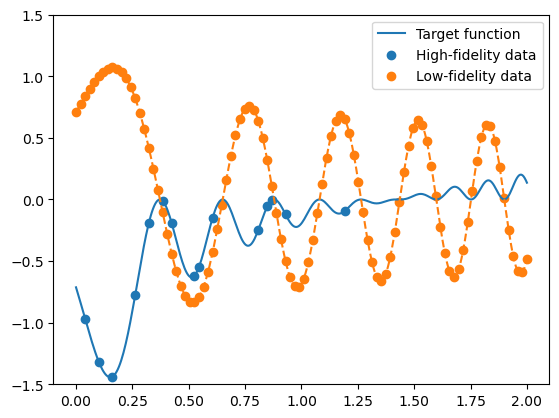

In [7]:
np.random.seed(24)

''' function definitions '''
def high(x):
    return (x-np.sqrt(2))*low(x)**2

def low(x):
    Ai, Aip, Bi, Bip = sp.special.airy(-2*np.pi*x)
    return 2*Ai
Nts = 400
Xtest = np.linspace(0,2, Nts)[:,None]
Exact= high(Xtest)
Low = low(Xtest)

plt.plot(Xtest,Exact,label="Target function")
plt.plot(Xtest,Low,"--")
plt.scatter(X2,Y2,label="High-fidelity data")
plt.scatter(X1,Y1,label="Low-fidelity data")
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()

df = pd.read_csv("low_fidelity_data.csv")
X1 = df["x"].to_numpy()[:,np.newaxis]
Y1 = df["y_low"].to_numpy()[:,np.newaxis]

df = pd.read_csv("high_fidelity_data.csv")
X2 = df["x"].to_numpy()[:,np.newaxis]
Y2 = df["y_high"].to_numpy()[:,np.newaxis]

In [20]:
# Load pickels of optimized models
with open("model_singleGP_RBF.pkl","rb") as f:
    model_singleGP_RBF = pickle.load(f)
with open("model_singleGP_SMK.pkl","rb") as f:
    model_singleGP_SMK = pickle.load(f)
with open("model_singleGP_NKN.pkl","rb") as f:
    model_singleGP_NKN = pickle.load(f)
with open("model_NARGP_RBF.pkl","rb") as f:
    model_NARGP_RBF = pickle.load(f)
with open("model_NARGP_SMK.pkl","rb") as f:
    model_NARGP_SMK = pickle.load(f)
with open("model_NARGP_NKN.pkl","rb") as f:
    model_NARGP_NKN = pickle.load(f)

mean_list = []
var_list = []
mean, var = model_singleGP_RBF.predict(Xtest); mean_list.append(mean[:,0]); var_list.append(var[:,0])
# mean, var = model_singleGP_SMK.predict(Xtest); mean_list.append(mean[:,0]); var_list.append(var[:,0])
mean, var = model_singleGP_NKN.predict(Xtest); mean_list.append(mean[:,0]); var_list.append(var[:,0])
# mean, var = model_NARGP_RBF.predict(Xtest); mean_list.append(mean[:,0]); var_list.append(var[:,0])
# mean, var = model_NARGP_SMK.predict(Xtest); mean_list.append(mean[:,0]); var_list.append(var[:,0])
mean, var = model_NARGP_NKN.predict(Xtest); mean_list.append(mean[:,0]); var_list.append(var[:,0])
label_list = [r"Single GP(RBF)", 
              # r"Single GP(SMK)",
              r"Single GP(NKN)",
              # r"NARGP(RBF)", 
              # r"NARGP(SMK)",
              r"NARGP(NKN)"]

2025-09-24 16:38:11.078483: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:11.078794: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:11.079061: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:11.089580: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:11.089776: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:11.089968: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:12.845846: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:12.846183: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:12.846449: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:12.856080: W tensorflow/core/util/util.cc:163] Not handling type DT_DOUBLE
2025-09-24 16:38:12.856287: W tensorflow/core/util/util.cc:163] Not handling typ

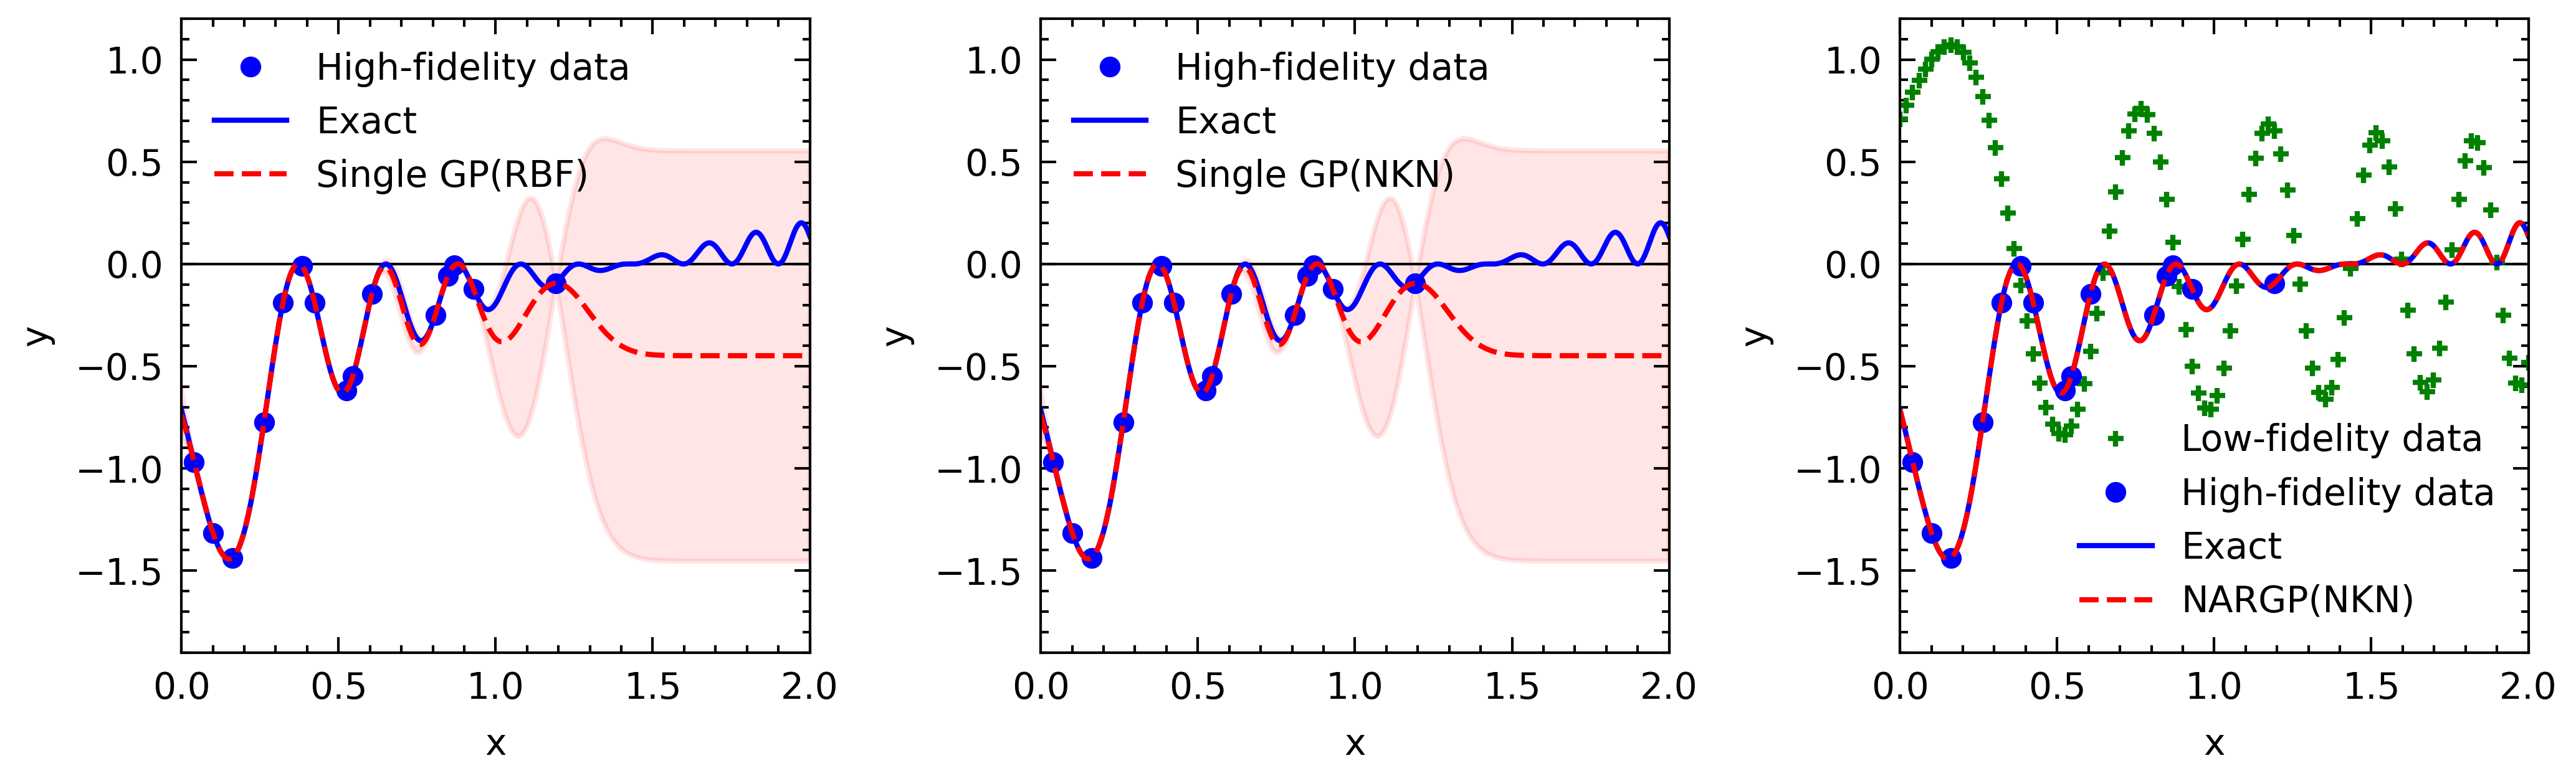

In [29]:
plt.style.use('../nature_style.txt')

fig=plt.figure(figsize=(7,2.2),dpi=600) # figsize=(width,height(inch)),dpi(dots per inch)
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.axhline(0,c="k",lw=0.5)
    if i == 2:
        ax.plot(X1, Y1,'g+', label="Low-fidelity data")
    ax.plot(X2, Y2,'bo', label="High-fidelity data")
    ax.plot(Xtest, Exact, 'b', label='Exact', linewidth=1)
    ax.plot(Xtest, mean_list[i], 'r--', label=label_list[i], linewidth=1)
    ax.fill_between(Xtest.ravel(), (mean_list[i]-2.0*np.sqrt(var_list[i])).ravel(), (mean_list[i]+2.0*np.sqrt(var_list[i])).ravel(), alpha=0.1, color='red')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim(-1.9,1.2)
    ax.set_xlim(0,2)
    ax.legend()
fig.tight_layout()
plt.savefig("fig2.pdf",dpi=600,bbox_inches="tight")
plt.show()